In [1]:
# Modelling objective:To identify factors leading to attrition/resignation of employees

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [7]:
# to import dataset
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [11]:
# to display variables in the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
# to check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [17]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [19]:
duplicates

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [21]:
# to print out categorical variable
df.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


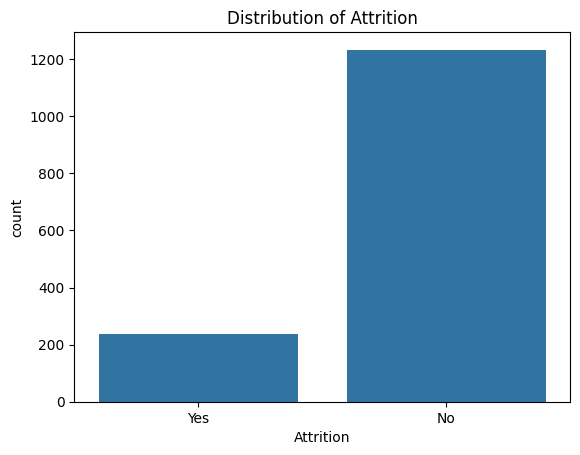

In [23]:
# to see distribution of target variable 'Attrition'
sns.countplot(data=df, x='Attrition')
plt.title('Distribution of Attrition')
plt.show()

In [25]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [29]:
# Class imbalanced: 16.12% resigned from the company
pd.DataFrame(100* df['Attrition'].value_counts()/len(df))

,count
Attrition,
No,83.877551
Yes,16.122449


In [31]:
# to check Age range of employees in the company
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

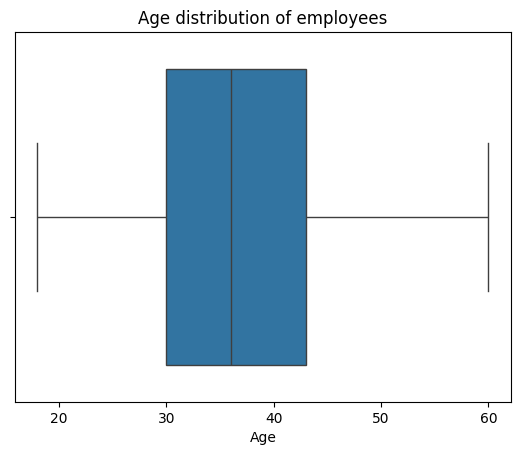

In [35]:
# Average age of employees = 37 years old
sns.boxplot(data=df, x='Age')
plt.title('Age distribution of employees')
plt.show()

In [37]:
# to define a custom function of age categories
# min. = 18 years
# max. = 60 years
def age_categories(s):
    if 18 <= s <= 30:
        return "18 to 30"
    elif 31 <= s <= 42:
        return "31 to 42"
    elif 43 <= s <= 55:
        return "43 to 55"
    elif s >= 56:
        return "above 56"

In [39]:
# to create new variable by applying custom function, .apply()
df['age_categories'] = df['Age'].apply(age_categories)

In [45]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_categories
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,31 to 42
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,43 to 55
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,31 to 42
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,31 to 42
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,18 to 30


In [49]:
df['age_categories'].value_counts()

age_categories
31 to 42    705
18 to 30    386
43 to 55    332
above 56     47
Name: count, dtype: int64

In [51]:
age_categories_order =['18 to 30',
                       '31 to 42',
                       '43 to 55',
                      'above 56']

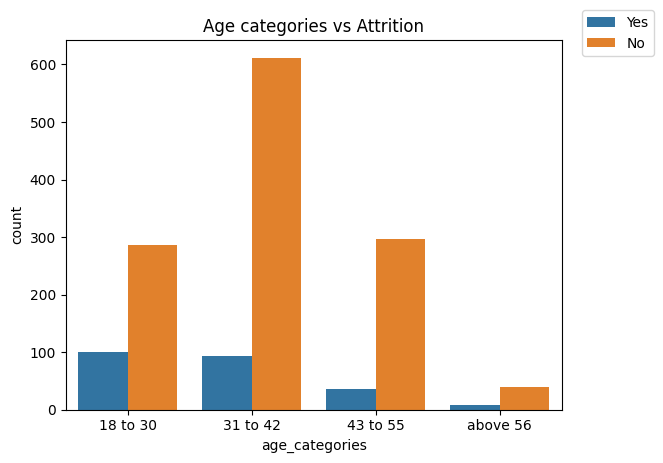

In [55]:
# exploratory data analysis 
# Employee who resigned are mostly in the age range : 18 to 30 years, 31 to 42 years
sns.countplot(data=df, x='age_categories', hue='Attrition', order=age_categories_order)
plt.title('Age categories vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

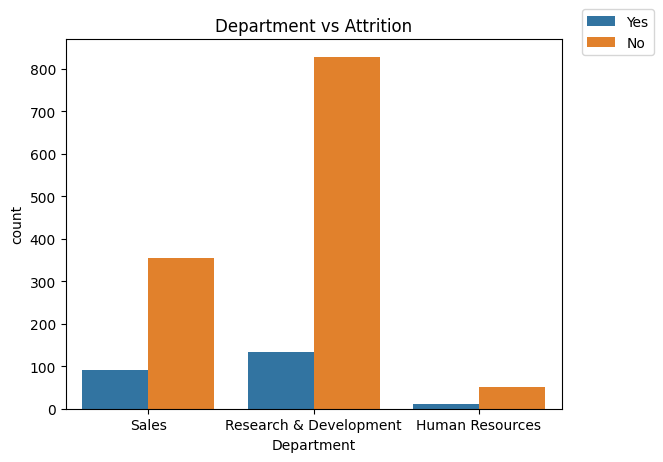

In [61]:
# most employee resignations came from Research & Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Department vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

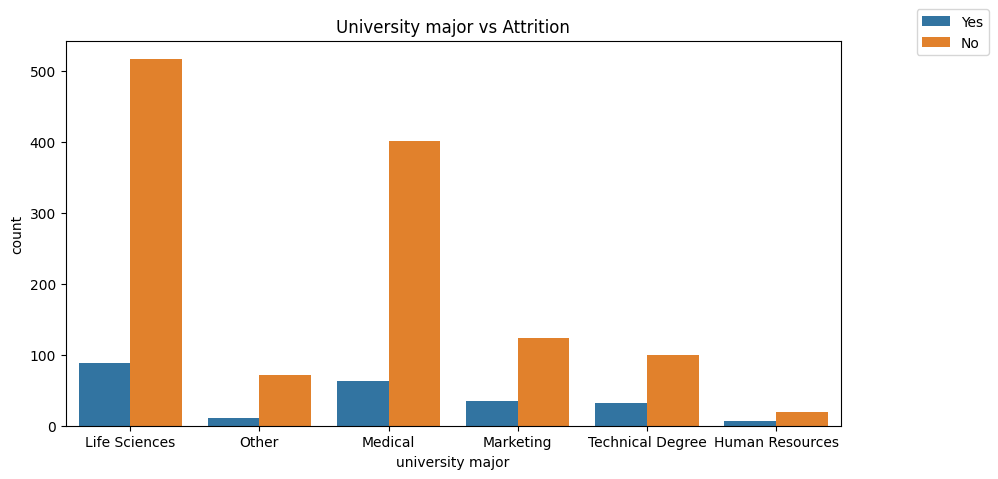

In [71]:
# Most resignations came from employees who majored in Life Sciences & Medical
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='EducationField', hue='Attrition')
plt.title('University major vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.xlabel('university major')
plt.show()

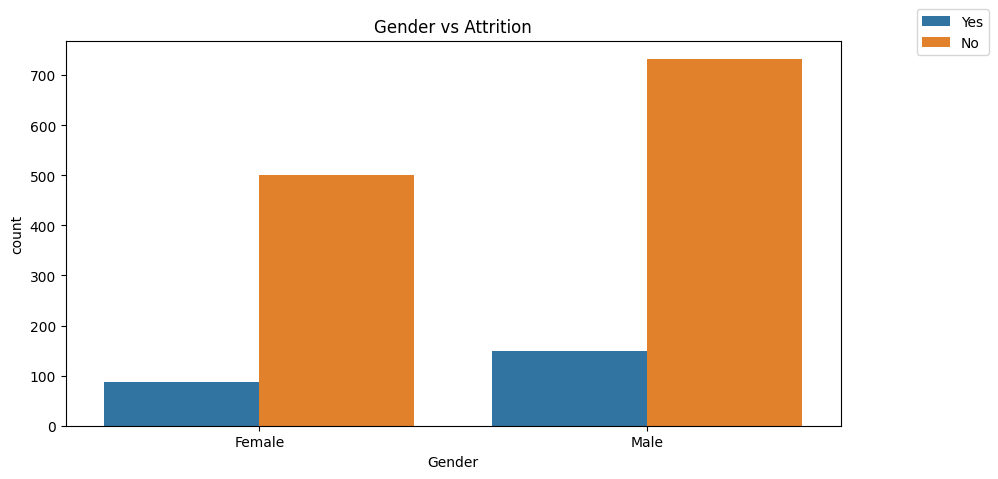

In [75]:
# majority of employees who resigned were males
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Gender vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

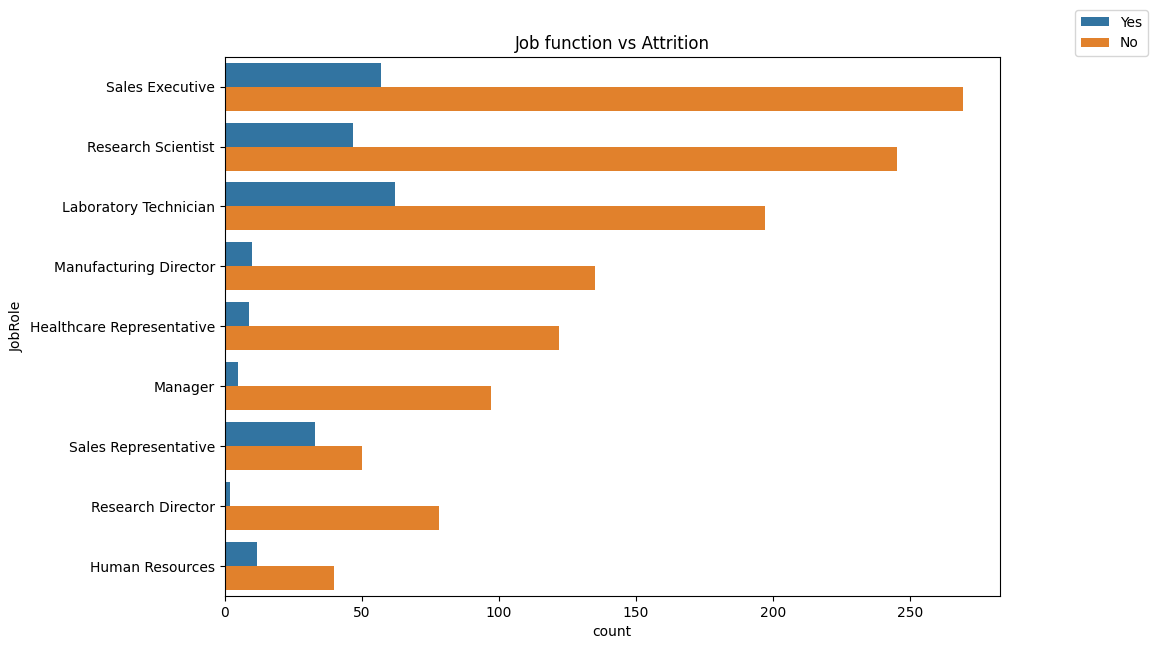

In [85]:
# Lab Technician & Sales Executive have the highest resignation rate
plt.figure(figsize=(10,7), dpi=100)
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title('Job function vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

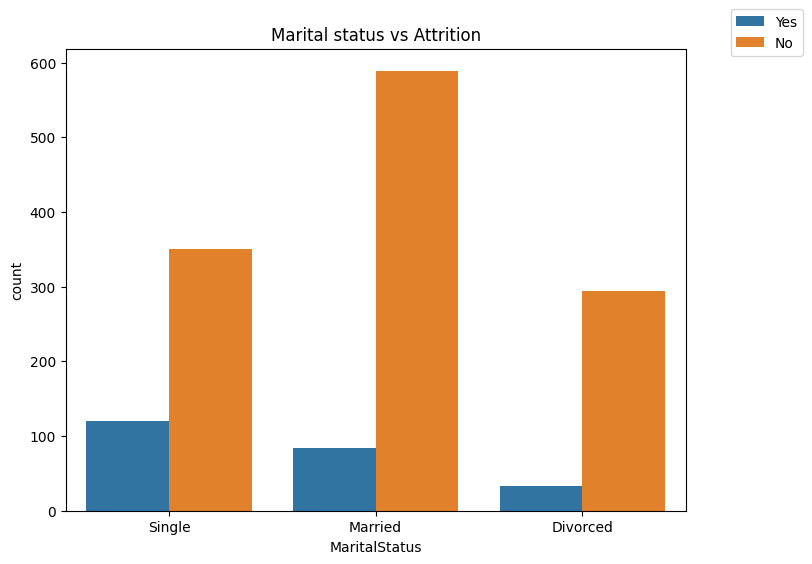

In [93]:
# majority of those who resigned are 'Single'
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Marital status vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [95]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

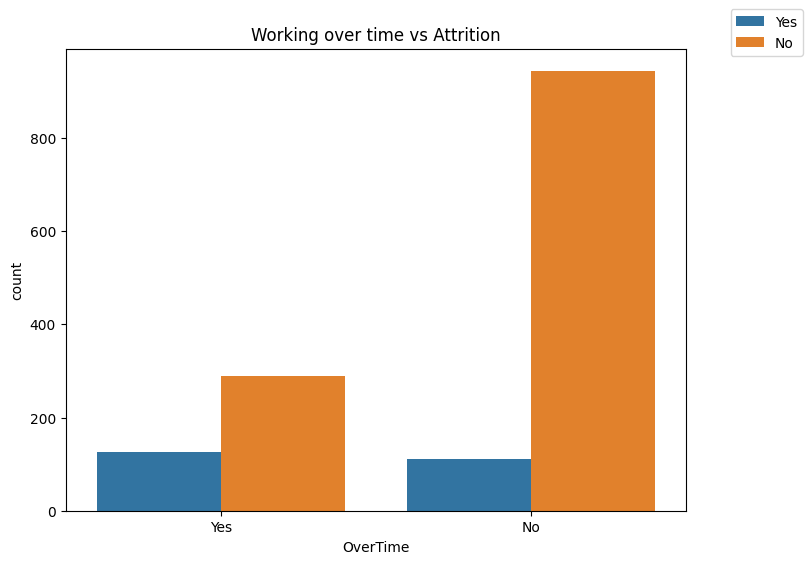

In [99]:
# those who resigned are those who mostly working over time
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Working over time vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

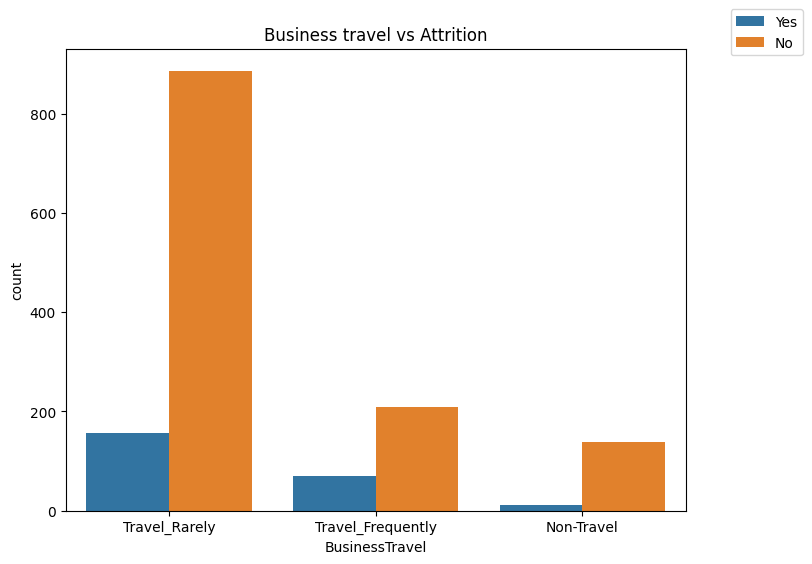

In [105]:
# Employees who resigned hardly go for business travel
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Business travel vs Attrition')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [107]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [109]:
# to convert 'Attrition' to numeric by mapping to perform further analysis
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [129]:
# to double-check change
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [131]:
df.select_dtypes(['int','float'])

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,42,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,87,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,63,2,...,4,80,0,17,3,2,9,6,0,8


In [123]:
# to see correlation of all numeric variables against 'Attrition'
# order by descending
# 'DistanceFromHome' and 'NumCompaniesWorked' shows the highest correlation to Attrition among all numeric variables
df.select_dtypes(['int', 'float']).corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N

In [117]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [143]:
df['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [145]:
# to remove 'EmployeeCount' and 'StandardHours', not useful variable for analysis
df = df.drop(['EmployeeCount','StandardHours'], axis=1)

In [147]:
# to read into a new df to plot a correlation heatmap
num_corr = df.select_dtypes(['int', 'float']).corr()

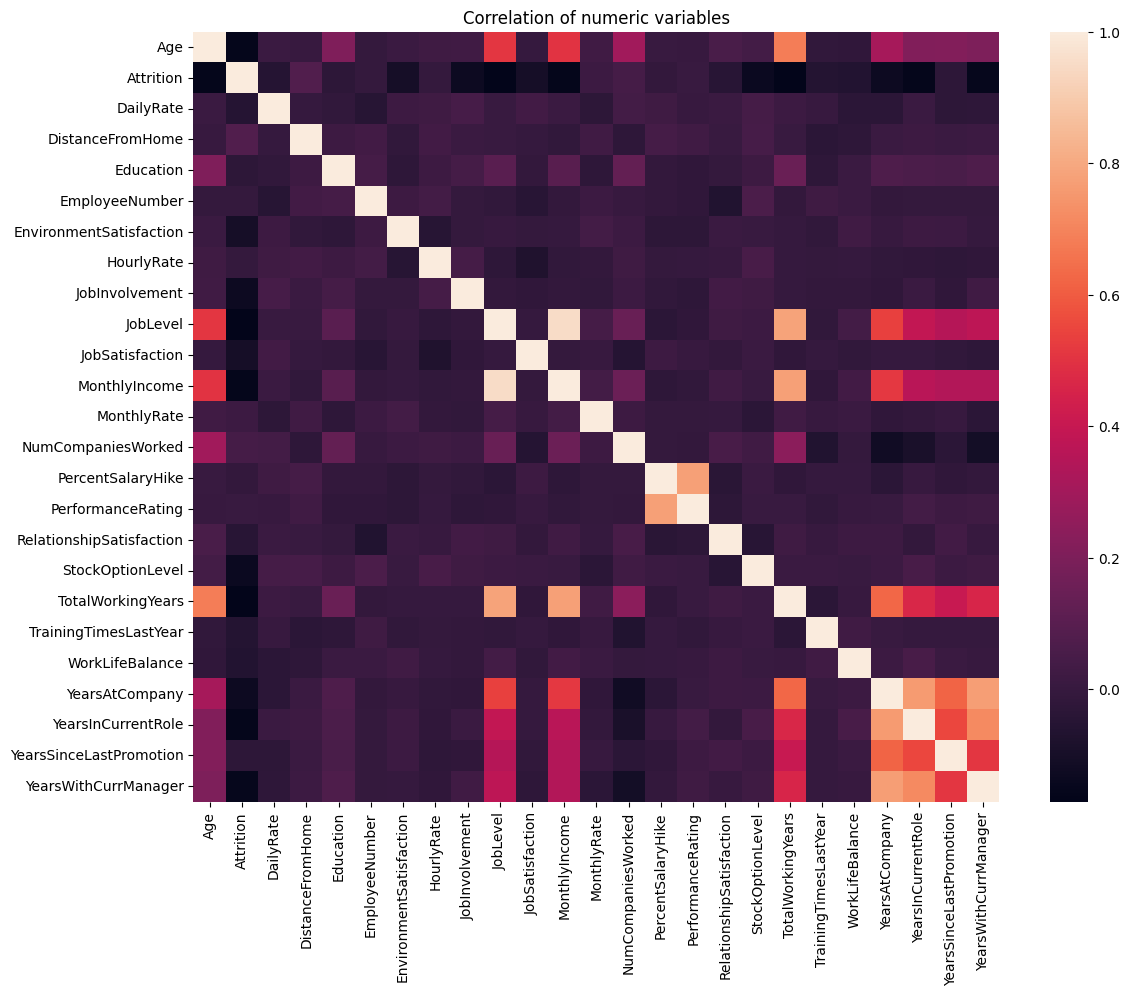

In [151]:
plt.figure(figsize=(13,10), dpi=100)
sns.heatmap(data=num_corr)
plt.title('Correlation of numeric variables')
plt.show()

In [153]:
# to remove unimportant variables before predictive modelling
df = df.drop(['age_categories','Over18','EmployeeNumber'], axis=1)

In [155]:
# to define X and y
X = df.drop('Attrition', axis=1)

In [157]:
# to convert categorical variable into dummy variables before modelling, drop_first=True to prevent multi-collinearity
X = pd.get_dummies(X, drop_first=True)

In [159]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,True,False,False,False,False,False,False,True,False,False
1466,39,613,6,1,4,42,2,3,1,9991,...,False,False,False,False,False,False,False,True,False,False
1467,27,155,4,3,2,87,4,2,2,6142,...,False,False,True,False,False,False,False,True,False,True
1468,49,1023,2,3,4,63,2,2,2,5390,...,False,False,False,False,False,True,False,True,False,False


In [161]:
y = df['Attrition']

In [163]:
from sklearn.model_selection import train_test_split

In [165]:
# to scale variables to the same scale
from sklearn.preprocessing import StandardScaler

In [167]:
# testing set = 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [169]:
# to create instance of a scaler 
scaler = StandardScaler()

In [171]:
# to scale, fit transform on the X train data to prevent data leakage to the y test set
scaled_X_train = scaler.fit_transform(X_train)

In [173]:
# to transform on the X testing set
scaled_X_test = scaler.transform(X_test)

In [175]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [177]:
from xgboost import XGBClassifier

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
rf = RandomForestClassifier()

In [183]:
# to fit Random forest model to training data
rf.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [185]:
# to predict on the testing set
rf_pred = rf.predict(scaled_X_test)

In [187]:
rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [189]:
# to do predictions on the training data
rf_train_pred = rf.predict(scaled_X_train)

In [191]:
rf_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [193]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [195]:
# to compute the confusion matrix for Random Forest training set
rf_train_cm = confusion_matrix(y_train, rf_train_pred, normalize='true')
rf_train_cm

array([[1., 0.],
       [0., 1.]])

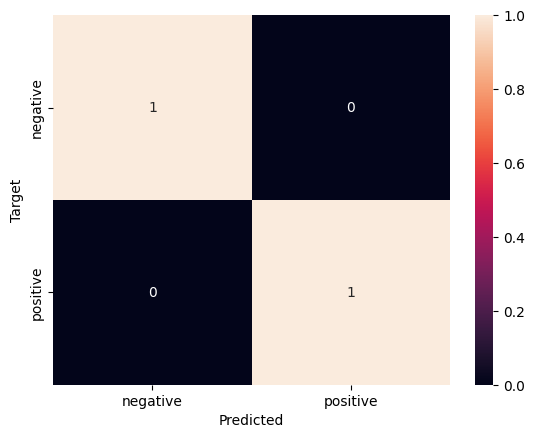

In [197]:
# to plot a confusion matrix of positive and negative classes of Random Forest train set
# Dataset seems overfitted
def plot_cm(rf_train_cm):
    classes = ['negative','positive']
    df_rf_train_cm = pd.DataFrame(rf_train_cm, index= classes, columns=classes)
    ax = sns.heatmap(df_rf_train_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(rf_train_cm)
plt.show()

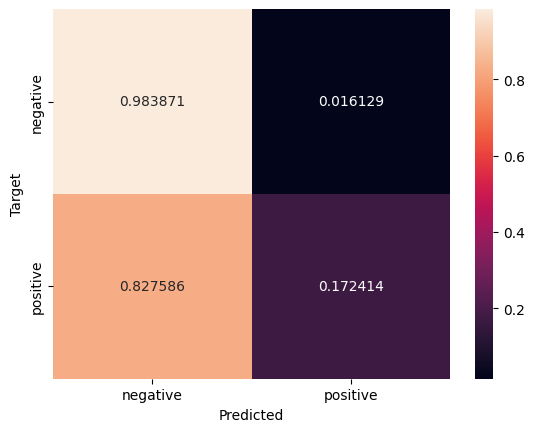

In [199]:
# Confusion matrix for Random Forest test set
# accuracy rate, negative cases = 98.38%
# accuracy rate, positive (Attrition) = 17.24%
rf_test_cm = confusion_matrix(y_test, rf_pred, normalize='true')
plot_cm(rf_test_cm) # plot_cms plots out the custom function
plt.show()

In [201]:
print("RF train AUC:", roc_auc_score(y_train, rf_train_pred))
print("RF test AUC:", roc_auc_score(y_test, rf_pred))

RF train AUC: 1.0
RF test AUC: 0.578142380422692


In [203]:
# AUC score for Random Forest classifier test model = 0.58

In [205]:
print("F1 train AUC:", f1_score(y_train, rf_train_pred))
print("F1 test AUC:", f1_score(y_test, rf_pred))

F1 train AUC: 1.0
F1 test AUC: 0.273972602739726


In [207]:
print(classification_report(y_test, rf_pred)) # Random Forest classifier

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       310
           1       0.67      0.17      0.27        58

    accuracy                           0.86       368
   macro avg       0.77      0.58      0.60       368
weighted avg       0.83      0.86      0.82       368



In [209]:
# to create AdaBoost classifier prediction model
ada = AdaBoostClassifier()

In [211]:
ada.fit(scaled_X_train, y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [213]:
ada_train_pred = ada.predict(scaled_X_train)

In [215]:
ada_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [217]:
# to predict on X test data
ada_pred = ada.predict(scaled_X_test)

In [221]:
ada_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [223]:
# confusion matrix for AdaBoost train set
ada_train_cm = confusion_matrix(y_train,ada_train_pred, normalize='true')
ada_train_cm

array([[0.9772481 , 0.0227519 ],
       [0.45251397, 0.54748603]])

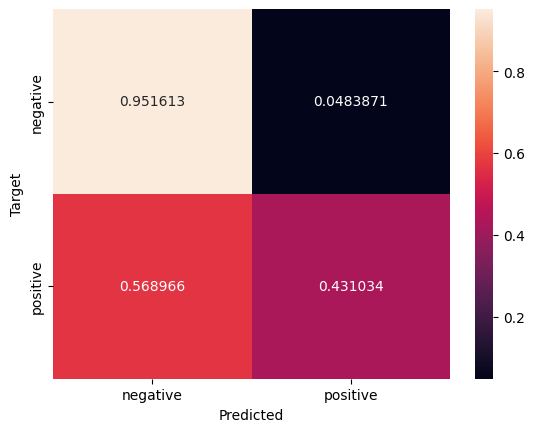

In [229]:
# Confusion matrix on AdaBoost test set
# accuracy rate, positive, Attrition = 43.1%
# accuracy rate, negative = 95.16%
ada_test_cm = confusion_matrix(y_test, ada_pred, normalize='true')
plot_cm(ada_test_cm)
plt.show()

In [231]:
print("Ada train AUC:", roc_auc_score(y_train, ada_train_pred))
print("Ada test AUC:", roc_auc_score(y_test, ada_pred))

Ada train AUC: 0.7623670687641102
Ada test AUC: 0.6913236929922135


In [233]:
# AUC score AdaBoost classifier Test model = 0.69

In [235]:
print("Ada train AUC:", f1_score(y_train, ada_train_pred))
print("Ada test AUC:", f1_score(y_test, ada_pred))

Ada train AUC: 0.6577181208053692
Ada test AUC: 0.5102040816326531


In [237]:
print(classification_report(y_test, ada_pred)) # AdaBoost classifier

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       310
           1       0.62      0.43      0.51        58

    accuracy                           0.87       368
   macro avg       0.76      0.69      0.72       368
weighted avg       0.86      0.87      0.86       368



In [239]:
gb = GradientBoostingClassifier()

In [241]:
gb.fit(scaled_X_train, y_train)

GradientBoostingClassifier()

In [243]:
# to predict on X test data
gb_pred = gb.predict(scaled_X_test)

In [247]:
gb_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [249]:
gb_train_pred = gb.predict(scaled_X_train)

In [251]:
gb_train_pred[:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [263]:
# confusion matrix for Ada Boost train set
gb_train_cm = confusion_matrix(y_train, gb_train_pred, normalize='true')
gb_train_cm

array([[0.99891658, 0.00108342],
       [0.22905028, 0.77094972]])

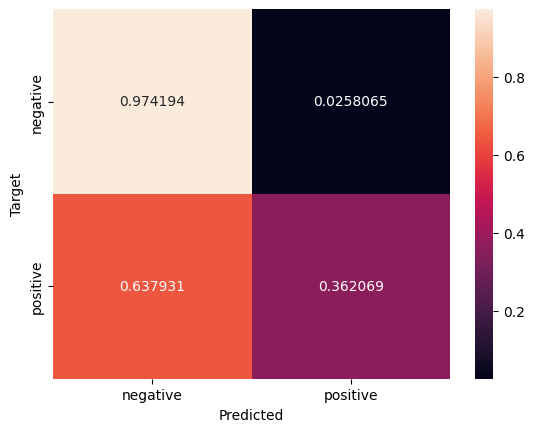

In [265]:
# Confusion matrix for Ada Boost testing set
# accuracy rate Positive (attrition) = 36.2%
# accuracy rate negative = 97.4%
gb_test_cm = confusion_matrix(y_test, gb_pred, normalize='true')
plot_cm(gb_test_cm)
plt.show()

In [267]:
print("GB train AUC:", roc_auc_score(y_train, gb_train_pred))
print("GB test AUC:", roc_auc_score(y_test, gb_pred))

GB train AUC: 0.8849331485258781
GB test AUC: 0.6681312569521691


In [269]:
# AUC score for Gradient Boost classifier test model = 0.67

In [271]:
print("GB train F1:", f1_score(y_train, gb_train_pred))
print("GB test F1:", f1_score(y_test, gb_pred))

GB train F1: 0.8679245283018868
GB test F1: 0.4827586206896552


In [275]:
print(classification_report(y_test, gb_pred))  # Gradient Boost classifier

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       310
           1       0.72      0.36      0.48        58

    accuracy                           0.88       368
   macro avg       0.81      0.67      0.71       368
weighted avg       0.86      0.88      0.86       368



In [317]:
xg = XGBClassifier()

In [319]:
xg.fit(scaled_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [321]:
# to predict on X testing data
xg_pred = xg.predict(scaled_X_test)

In [323]:
xg_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [325]:
# to predict on X train set
xg_train_pred = xg.predict(scaled_X_train)

In [327]:
xg_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [333]:
# Confusion matrix on training set
xg_train_cm = confusion_matrix(y_train, xg_train_pred,normalize='true')
xg_train_cm

array([[1., 0.],
       [0., 1.]])

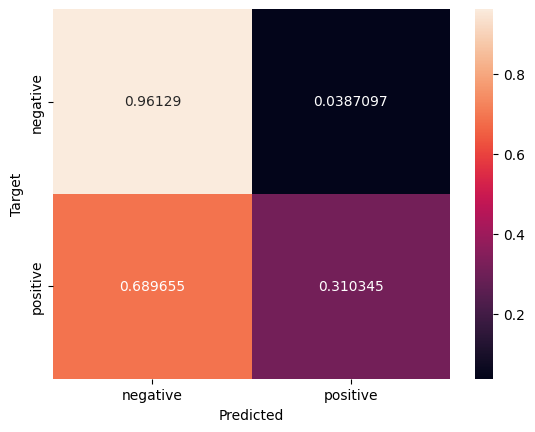

In [335]:
# Confusion matrix on Test set
# accuracy rate, positive ('Attrition') = 31%
# accuracy rate, negative = 96.1%
xg_test_cm = confusion_matrix(y_test, xg_pred, normalize='true')
plot_cm(xg_test_cm)
plt.show()

In [331]:
print("XGB train AUC:", roc_auc_score(y_train, xg_train_pred))
print("XGB test AUC:", roc_auc_score(y_test, xg_pred))

XGB train AUC: 1.0
XGB test AUC: 0.6358175750834261


In [307]:
# AUC score for XGBoost classifier test model = 0.64

array([0, 1], dtype=int64)

In [337]:
print("XGB train F1:", f1_score(y_train, xg_train_pred))
print("XGB test F1:", f1_score(y_test, xg_pred))

XGB train F1: 1.0
XGB test F1: 0.4090909090909091


In [339]:
print(classification_report(y_test, xg_pred)) # XGBoost classifier

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       310
           1       0.60      0.31      0.41        58

    accuracy                           0.86       368
   macro avg       0.74      0.64      0.66       368
weighted avg       0.84      0.86      0.84       368



In [341]:
dt = DecisionTreeClassifier()

In [343]:
dt.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [345]:
# to predict on X testing data
dt_pred = dt.predict(scaled_X_test)

In [349]:
dt_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [351]:
# to predict on X training set
dt_train_pred = dt.predict(scaled_X_train)

In [353]:
dt_train_pred[:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [355]:
# Confusion matrix on Decision tree train set
dt_train_cm = confusion_matrix(y_train, dt_train_pred, normalize='true')
dt_train_cm

array([[1., 0.],
       [0., 1.]])

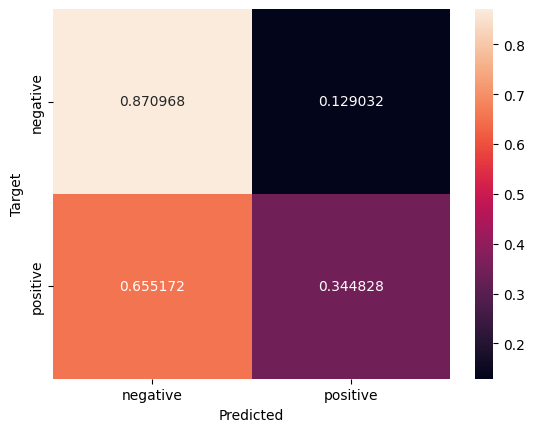

In [357]:
# Confusion matrix on Decision tree test set
# accuracy rate, positive (Attrition) = 34.4%
# accuracy rate, negative = 87%
dt_test_cm = confusion_matrix(y_test, dt_pred, normalize='true')
plot_cm(dt_test_cm)
plt.show()

In [361]:
print("DT train AUC:", roc_auc_score(y_train, dt_train_pred))
print("DT test AUC:", roc_auc_score(y_test, dt_pred))

DT train AUC: 1.0
DT test AUC: 0.6078976640711902


In [363]:
# AUC score for Decision Tree classifier test model = 0.61

In [365]:
print("DT train F1:", f1_score(y_train, dt_train_pred))
print("DT test F1:", f1_score(y_test, dt_pred))

DT train F1: 1.0
DT test F1: 0.3389830508474576


In [367]:
print(classification_report(y_test, dt_pred)) # Decision Tree classifier

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       310
           1       0.33      0.34      0.34        58

    accuracy                           0.79       368
   macro avg       0.60      0.61      0.61       368
weighted avg       0.79      0.79      0.79       368



In [369]:
# AUC score for AdaBoost classifier is the highest at 0.69
# to compute Predictor from AdaBoost classifier prediction model

In [371]:
ada.feature_importances_

array([0.06, 0.06, 0.04, 0.  , 0.02, 0.  , 0.06, 0.04, 0.04, 0.12, 0.06,
       0.04, 0.  , 0.  , 0.02, 0.02, 0.04, 0.  , 0.02, 0.04, 0.02, 0.04,
       0.06, 0.02, 0.  , 0.  , 0.02, 0.02, 0.  , 0.  , 0.  , 0.  , 0.02,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.  , 0.  , 0.  , 0.02, 0.06])

In [375]:
pd.DataFrame(data= ada.feature_importances_, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
MonthlyIncome,0.12
Age,0.06
JobInvolvement,0.06
DailyRate,0.06
MonthlyRate,0.06
YearsWithCurrManager,0.06
OverTime_Yes,0.06
TotalWorkingYears,0.04
JobLevel,0.04
DistanceFromHome,0.04


In [377]:
# to read into a new data frame
ada_imp = pd.DataFrame(data= ada.feature_importances_, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [379]:
# to filter out featues less than 0
ada_imp = ada_imp[ada_imp['Importance'] > 0.01]

In [381]:
ada_imp

,Importance
MonthlyIncome,0.12
Age,0.06
JobInvolvement,0.06
DailyRate,0.06
MonthlyRate,0.06
YearsWithCurrManager,0.06
OverTime_Yes,0.06
TotalWorkingYears,0.04
JobLevel,0.04
DistanceFromHome,0.04


C:\Users\miche\AppData\Local\Temp\ipykernel_18336\2401177700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ada_imp, y=ada_imp.index, x='Importance', palette='flare')


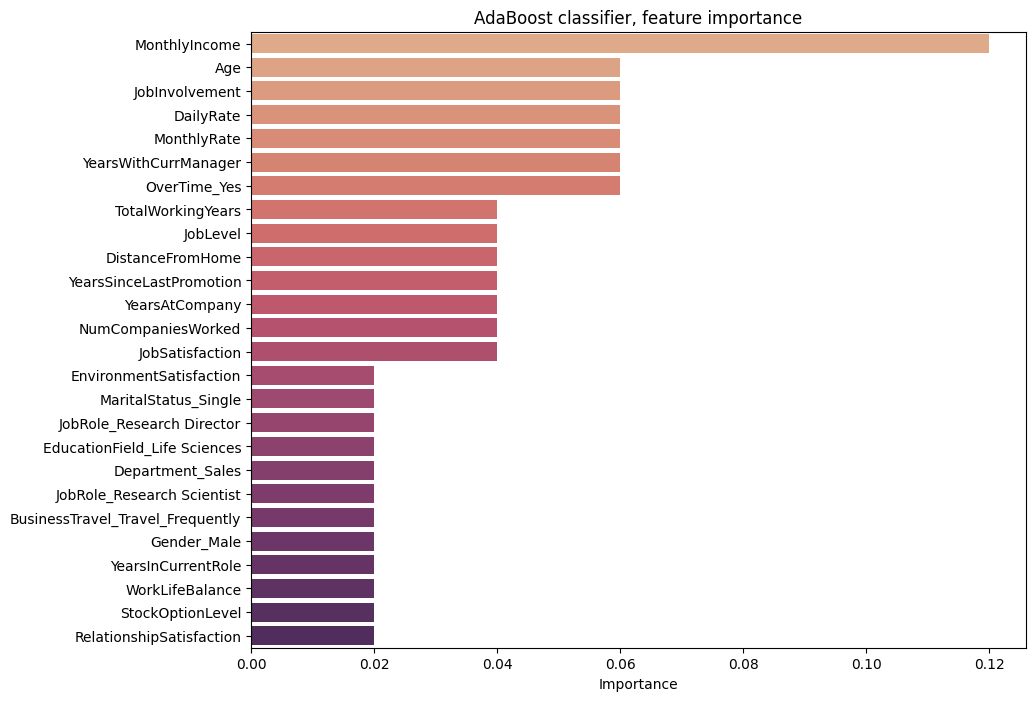

In [405]:
# Predictors of employee attrition = 1) Monthly Income, 2) Age, 3)Job involvement, 4)Daily rate
# to visualise predictor of Attrition rate in a barplot
plt.figure(figsize=(10,8), dpi=100)
sns.barplot(data=ada_imp, y=ada_imp.index, x='Importance', palette='flare')
plt.title("AdaBoost classifier, feature importance", fontsize=12)
plt.ylabel("")
plt.show()

In [ ]:
# Job involvement 
#  1 = 'Low'
#  2 = 'Medium'
#  3 = 'High'
#  4 = 'Very High'